In [3]:
#import libraries import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_csv(r"C:\Users\VEDANSH SINGH\Desktop\DA-DS Projects\data sets\House Price India.csv")
print(df.head())
print(df.info())

           id   Date  No of bedrooms  No of bathrooms  living area  lot area  \
0  6762810635  42491               4             2.50         2920      4000   
1  6762810998  42491               5             2.75         2910      9480   
2  6762812605  42491               4             2.50         3310     42998   
3  6762812919  42491               3             2.00         2710      4500   
4  6762813105  42491               3             2.50         2600      4750   

   No of floors  waterfront present  No of views  house condition  ...  \
0           1.5                   0            0                5  ...   
1           1.5                   0            0                3  ...   
2           2.0                   0            0                3  ...   
3           1.5                   0            0                4  ...   
4           1.0                   0            0                4  ...   

   Built Year  Renovation Year  Postal Code  Lattitude  Longitude  \
0    

In [5]:
# Drop unwanted columns
df = df.drop(["id", "Date", "Postal Code"], axis=1)

In [6]:
#Feature/Target Split
x = df.drop("Price", axis = 1)
y = df["Price"]

In [7]:
#Train/Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [9]:
#model training (linear Regression)
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

In [12]:
#model training (random forest regressor)
from sklearn.ensemble import RandomForestRegressor 
rf = RandomForestRegressor(n_estimators = 200, random_state = 42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

In [14]:
#evaluation
from sklearn.metrics import mean_squared_error, r2_score
print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))

print("Random Forest R2:", r2_score(y_test, y_pred_rf))
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))

Linear Regression R2: 0.7015336449795686
Linear Regression MSE: 44171848044.89228
Random Forest R2: 0.8839398388195959
Random Forest MSE: 17176447922.833971


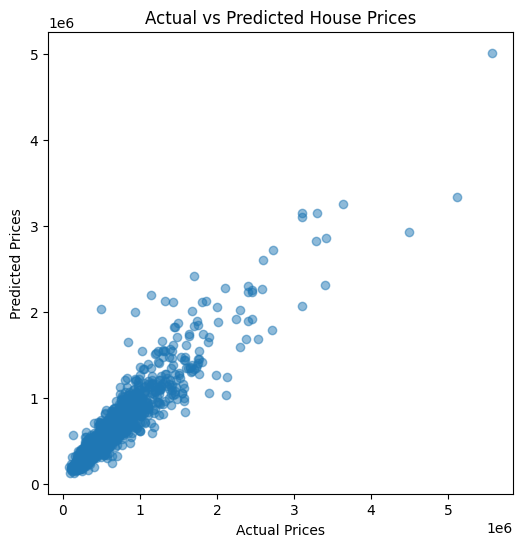

In [16]:
#visualization 
#predicted vs actual
import matplotlib.pyplot as plt 
plt.figure(figsize = (6, 6))
plt.scatter(y_test, y_pred_rf, alpha = 0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

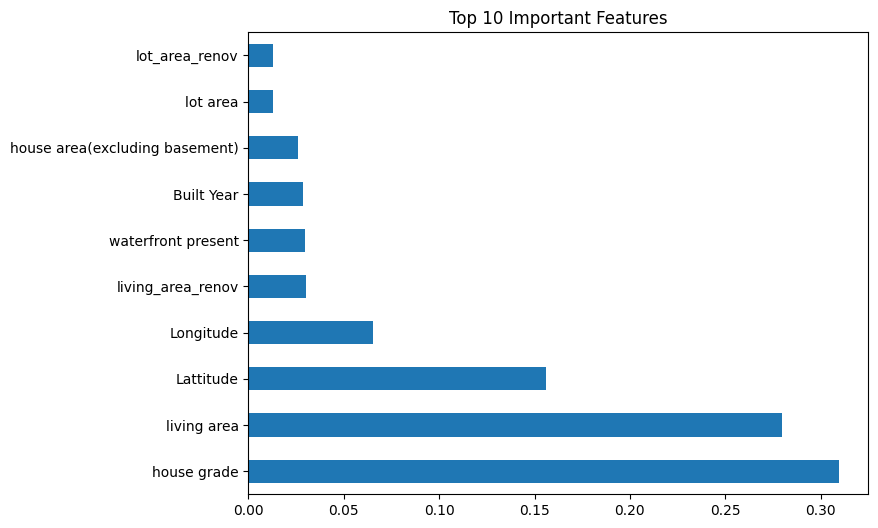

In [19]:
#feature importance 
feat_importances = pd.Series(rf.feature_importances_, index = x.columns)
feat_importances.nlargest(10).plot(kind = 'barh', figsize = (8, 6))
plt.title("Top 10 Important Features")
plt.show